In [1]:
from typing import Dict, List

import os
import torch
import numpy as np
import networkx as nx
from networkx import DiGraph
from torch_geometric.data import Data
from torch_geometric.transforms import LocalDegreeProfile
from torch_geometric.utils import degree
from torch_geometric.nn.aggr.fused import FusedAggregation

from master_thesis.classification_models import BaseModel, LDPModel
from master_thesis.tools.data import  load_np_data, Preprocessing
from master_thesis.tools.plots import draw_network

NETWORKS_DIR_PATH = "/Users/wciezobka/sano/projects/masters-thesis/Datasets/Synthetic/ScaleFreeBias/networks"

aggr = FusedAggregation(['min', 'max', 'mean', 'std'])

Data(edge_index=[2, 9], y=[1], num_nodes=5, num_edges=9)

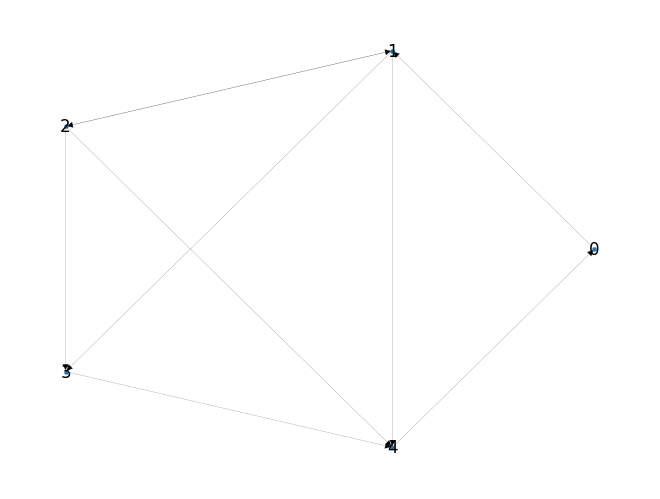

In [2]:
# Create sample directed graph
G = DiGraph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 0), (0, 1), (1, 3), (1, 4), (2, 1), (2, 4)])
draw_network(G, with_labels=True)

# Create torch_geometric data from the graph
data = BaseModel.nx2geometric("cpu", G, x_attr=None, label=1)
data

In [3]:
row, col = data.edge_index
N = data.num_nodes
row, col, N

deg_out = degree(row, N, dtype=torch.float).view(-1, 1)
deg_in = degree(col, N, dtype=torch.float).view(-1, 1)
xs = [deg_out] + aggr(deg_out[col], row, dim_size=N) + [deg_in] + aggr(deg_in[row], col, dim_size=N)

data.x = torch.cat(xs, dim=-1)

In [4]:
print(f"Degree out: {deg_out.reshape(-1)}\nDegree in:  {deg_in.reshape(-1)}")
print(f"\nRow: {row}\nCol: {col}")
print(f"\nNei_out: {deg_out[col].reshape(-1)}\nNei_in:  {deg_in[row].reshape(-1)}")

Degree out: tensor([1., 3., 3., 1., 1.])
Degree in:  tensor([1., 2., 1., 2., 3.])

Row: tensor([0, 1, 1, 1, 2, 2, 2, 3, 4])
Col: tensor([1, 2, 3, 4, 3, 1, 4, 4, 0])

Nei_out: tensor([3., 3., 1., 1., 1., 3., 1., 1., 1.])
Nei_in:  tensor([1., 2., 2., 2., 1., 1., 1., 2., 3.])


In [5]:
data

Data(edge_index=[2, 9], y=[1], num_nodes=5, num_edges=9, x=[5, 10])